In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

## Problem 1 


$f'(x \pm \delta) \approx f(x)\pm\delta f'(x)+\frac{\delta^2}{2}f''(x)\pm\frac{\delta^3}{3!}f'''(x)+\frac{\delta^4}{4!}f^{(4)}(x)\pm\frac{\delta^5}{5!} f^{(5)}(x)$  
$f'(x \pm 2\delta) \approx f(x) \pm (2\delta) f'(x)+\frac{(2\delta)^2}{2}f''(x)\pm\frac{(2\delta)^3}{3!}f'''(x)+\frac{(2\delta)^4}{4!}f^{(4)}(x)\pm\frac{(2\delta)^5}{5!} f^{(5)}(x)$  
$f(x+\delta)-f(x-\delta)=2\delta f'(x) + \frac{2}{6}\delta^3f'''(x) + \frac{2}{120}\delta^5 f^{(5)}(x)$
<br>
$f(x+2\delta)-f(x-2\delta)=4\delta f'(x) + \frac{16}{6}\delta^3f'''(x) + \frac{64}{120}\delta^5 f^{(5)}(x)$
<br>
$f'(x)-\frac{1}{30}\delta^4f^{(5)}(x) = \large\frac{8f(x+2\delta)-8f(x-2\delta)-f(x+\delta)-f(x-\delta)}{12\delta}$
<br>
Error $= \frac{1}{30}\delta^4f^{(5)}(x) + \frac{f(x)}{\delta}\epsilon_m$
<br>
Differentiating Error: $\delta = (\large\frac{15f(x)}{2f^{(5)}(x)}\epsilon_m)^{\frac{1}{5}}$

f(x) = exp(x) has error -2.8703652787953615e-09 and dx of  0.0009440875112949016
f(x) = exp(0.01x) has error 4.0072112295064244e-16 and dx of  0.09440875112949018


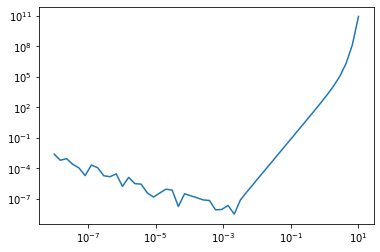

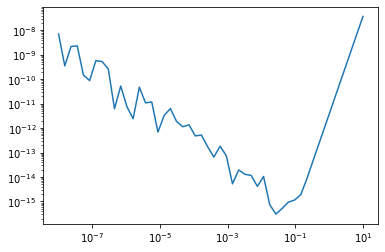

In [286]:
def get_deriv(func, delta, x, func_first, func_fifth):
    eps = 10**-16
    if delta is None:
        delta = (15/2 * func(x)/func_fifth(x) * eps)**(1/5)
    deriv = 1/(12*delta)*(8*func(x+delta)-8*func(x-delta)+func(x-2*delta)-func(x+2*delta))
    return deriv - func_first(x), delta

def exp2(x):
    return np.exp(0.01*x)
def first_exp2(x):
    return 0.01*np.exp(0.01*x)
def fifth_exp2(x):
    return 0.01**5*np.exp(0.01*x)


f1 = get_deriv(np.exp, None, 10, np.exp, np.exp)
f2 = get_deriv(exp2, None, 10, first_exp2, fifth_exp2)

print('f(x) = exp(x) has error', f1[0], 'and dx of ', f1[1])
print('f(x) = exp(0.01x) has error', f2[0], 'and dx of ', f2[1])

deltas = np.logspace(-8, 1, num=50)
y = []
for i in range(len(deltas)):
    y.append(abs(get_deriv(np.exp, deltas[i], 10, np.exp, np.exp)[0]))
plt.yscale('log')
plt.xscale('log')
plt.plot(deltas, y, '-')

plt.show()

y2 = []
for i in range(len(deltas)):
    y2.append(abs(get_deriv(exp2, deltas[i], 10, first_exp2, fifth_exp2)[0]))
plt.yscale('log')
plt.xscale('log')
plt.plot(deltas, y2, '-')

plt.show()

# Problem 2


Error $= \frac{1}{6}\delta^2f^{(3)}(x) + \frac{1}{\delta}f(x)\epsilon_m$
Differentiating to minimize error: $\delta = (3\frac{f(x)}{f^{(3}(x)}\epsilon_m)^{\frac{1}{3}}$
<br>
We approximate $\frac{f(x)}{f^{(3}(x)} \approx 1$
<br>
Plugging our optimized $\delta$ back into our Error:
<br>
Error = $(\frac{1}{6}3^{\frac{2}{3}} + 3^{\frac{-1}{3}})\epsilon_m^{\frac{2}{3}} \approx \epsilon_m^{\frac{2}{3}}$

In [287]:
def ndiff(fun, x, full=False):
    dx = 10**-(16/3)
    eps = 10**-16
    if full == False:
        deriv = (fun(x+dx) - fun(x-dx))/(2*dx)
        return deriv
    if full == True:
        deriv = (fun(x+dx) - fun(x-dx))/(2*dx)
        error = eps**(2/3)
        return deriv, dx, error


# Problem 3

Here I choose to use a Linear Interpolator to interpolate for temperature values given voltages using lakeshore.txt data. To estimate the error, I ran another interpolation (the choice being polyfit) and took the differences between the results for temperature that the 2 different interpolations outputed as a rough estimate for the error.

In [288]:
dat = np.loadtxt('lakeshore.txt')
def lakeshore(V, data):
    T, Volts = data[:,0], data[:,1]
    Volts = np.flip(Volts)
    T = np.flip(T)
    y1 = np.interp(V, xp = Volts, fp = T) # Linear Interpolator
    
    if type(V) == isinstance(V,int) or isinstance(V,float): # for a single V input
        ind = np.argwhere(np.array(Volts)>V)[0][0]
        x = Volts[ind-1:ind+3]
        y = T[ind-1:ind+3]
        p = np.polyfit(x, y, 3) # Cubic Interpolator
        y2 = np.polyval(p,V)
        
    else: # for an array of V inputs
        y2 = np.empty(len(V))
        for i in range(len(V)):
            ind = np.argwhere(np.array(Volts)>V[i])[0][0]
            x = Volts[ind-1:ind+3]
            y = T[ind-1:ind+3]
            p = np.polyfit(x, y, 3) # Cubic Interpolator
            y2[i] = np.polyval(p,V[i])
            
    error = y1 - y2
    
    return y1, error

lakeshore(0.5, dat)

(325.7454310900881, -0.0036063721148593686)

# Problem 4

We expect the error of our rational function fit to be approximately on the order of machine error. As order (n,m) were changed, the rational function fit did indeed output similar errors on the order of $10^{(-16)}$ as we expected. 
<br>
Switching from np.linalg.inv to np.linalg.pinv prevents the coefficients from blowing up when inverting the matrix. We can see by looking at the matrix and p,q values after using inv vs pinv that the p,q arrays for inv blow up and give us non-zero coefficients for polynomial terms we don't want, where as pinv sets those very small terms to 0 in the invert leaving only non-zero coefficients of the terms we want.

In [328]:
def PolyInterp(func, x):
    y = func(x)
    for i in range(len(xx)):
        ind=(xx[i]-x[0])/dx
        ind=int(np.floor(ind))
        x_use=x[ind-1:ind+3]
        y_use=y[ind-1:ind+3]
        p=np.polyfit(x_use,y_use,2)
        yy[i]=np.polyval(p,xx[i])
        
    plt.plot(xx, yy, '-', label = 'Polynomial')
    plt.plot(xx, y_true, '-', label = 'True Function')
    error = yy - y_true
    
    return error

def CubicSpline(func, x):
    y = func(x)
    spln=interpolate.splrep(x,y)
    yy=interpolate.splev(xx,spln)
    
    plt.plot(xx, yy, '-', label = 'Cubic Spline')
    #plt.plot(xx, y_true, '-')
    error = yy - y_true
    
    return error
            

In [436]:
def Rational(func, x):
    def rat_eval(p,q,x):
        top=0
        for i in range(len(p)):
            top=top+p[i]*x**i
        bot=1
        for i in range(len(q)):
            bot=bot+q[i]*x**(i+1)
        return top/bot
    
    def rat_fit(x,y,n,m):
        assert(len(x)==n+m-1)
        assert(len(y)==len(x))
        mat=np.zeros([n+m-1,n+m-1])
        for i in range(n):
            mat[:,i]=x**i
        for i in range(1,m):
            mat[:,i-1+n]=-y*x**i
        pars=np.dot(np.linalg.pinv(mat),y)
        p=pars[:n]
        q=pars[n:]
        return p,q
    n = 4
    m = 5

    y = func(x)
    p, q = rat_fit(x,y,n,m)
    pred = rat_eval(p,q,xx)
    fitp = np.polyfit(x,y,n+m-1)
    pred_poly = np.polyval(fitp,xx)
    
    yy_interp = rat_eval(p,q,xx)
    plt.plot(xx, pred, label = 'Rational')

    error = pred - y_true
    return error

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':


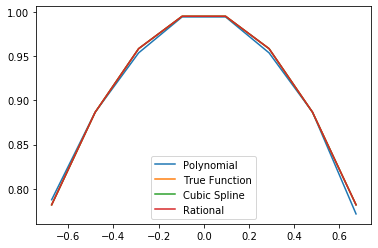

In [437]:
x = np.linspace(-np.pi/2, np.pi/2, 8)
xx=np.linspace(x[2],x[-3], 8)
dx=x[1]-x[0]
yy=np.empty(len(xx))
y_true = np.cos(xx)

PolyInterp(np.cos, x)
CubicSpline(np.cos, x)
Rational(np.cos, x)
plt.legend()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


array([-4.44089210e-16, -4.44089210e-16, -1.11022302e-16, -5.55111512e-16,
       -5.55111512e-16, -1.11022302e-16, -3.33066907e-16, -4.44089210e-16])

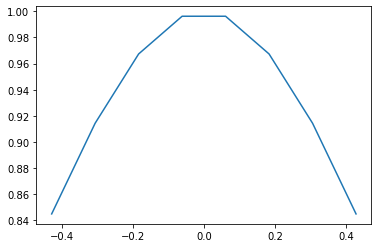

In [438]:
def Lorentz(x):
    return 1/(1+x**2)

x = np.linspace(-1, 1, 8)
xx=np.linspace(x[2],x[-3], 8)
yy=np.empty(len(xx))
dx=x[1]-x[0]
y_true = Lorentz(xx)

PolyInterp(Lorentz, x)
CubicSpline(Lorentz, x)
Rational(Lorentz, x)
plt.legend()